<a href="https://colab.research.google.com/github/yaiza612/Climate_change/blob/main/Climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





# **Practical Assessment 2**


### Statistical Data Analysis and Visualization
*by Yaiza ARNAIZ ALCACER (251), Pablo MARCOS LOPEZ (269),Alexandre VERGNAUD (178) and Lexane LOUIS (179)*

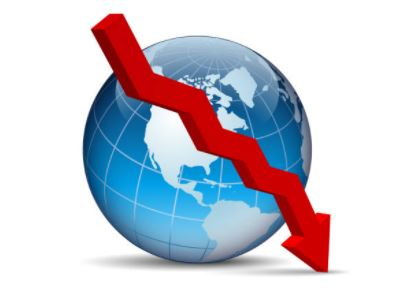

## **INTRODUCTION**

Climate change is a lasting change in the statistical parameters of the Earth's global climate or its various regional climates. These changes may be due to processes intrinsic to the Earth, to external influences or, more recently, to human activities. Indeed, the Industrial Revolution has led to a change in the composition of the Earth's atmosphere as a result of greenhouse gas emissions from human activities. Natural variations in climate can overlap. This is the defining issue of our time and we are at a tipping point: from changes in weather conditions affecting agricultural and food production to rising sea levels increasing the risk of flooding, the consequences of climate change are global in impact and scale. Without immediate action, it will be much more difficult and costly to adapt to the future consequences of these changes.

However, despite the existence of this clear consensus that the planet is warming due to human action, many continue to doubt the existence of this relationship, or of global warming itself. In order to try to clarify any doubts that may exist on the subject, and to conclusively demonstrate the existence of this warming and its association with the concentration of CO2 in the atmosphere, we have decided to carry out a statistical analysis of the correlation between these two variables.

In addition, to confirm that these changes are mainly due to human activities, we have also decided to investigate the correlation of these variables with a historical series of GDP data (estimated up to 1950). The correlation between them and with GDP can serve as indirect evidence of industrial activity and thus of human culpability in global warming.

Finally, to analyse the changes that await our planet in the future, we wanted to analyse the rise in sea level from 1850 to the present, as this is one of the best known and most dangerous consequences of climate change.

Our hypothesis is then : 

**Are CO2 concentration and human activities linked to global warming ? And is the rise of the sea level a consequence of the climate change ?**


## **DESCRIPTIVE REPORT OF THE DATASETS**

To proceed with this analysis, we have chosen four datasets:
* To investigate and analyse the variation of temperature over time, we have downloaded a dataset from a [Kaggle competition](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data) including data from the Berkeley Earth Surface Temperature Study, which combines 1.6 billion temperature reports from 16 pre-existing archives and accounts both for the average temperature over land (including data since 1750) and for the average temperature over sea (since 1850). These data have been processed and normalised using criteria provided by Berkeley Earth, to take into account various factors such as the different types of thermometers used (mercury thermometers are more inaccurate), the movement of the location of the measuring stations or the use of new measurement techniques.
This dataset gather these several files :
 - Global Land and Ocean-and-Land Temperatures (GlobalTemperatures.csv)
 - Global Average Land Temperature by Country (GlobalLandTemperaturesByCountry.csv)
 - Global Average Land Temperature by State (GlobalLandTemperaturesByState.csv)
 - Global Land Temperatures By Major City (GlobalLandTemperaturesByMajorCity.csv)
 - Global Land Temperatures By City (GlobalLandTemperaturesByCity.csv)


* To understand the growth in atmospheric CO2 concentration, and how this correlates with the previous dataset, we have used a [database from the Institute for Atmospheric and Climate science in Zurich](ftp://data.iac.ethz.ch/CMIP6/input4MIPs/UoM/GHGConc/CMIP/mon/atmos/UoM-CMIP-1-1-0/GHGConc/gr3-GMNHSH/v20160701/mole_fraction_of_carbon_dioxide_in_air_input4MIPs_GHGConcentrations_CMIP_UoM-CMIP-1-1-0_gr3-GMNHSH_000001-201412.csv) (Switzerland), which includes data from year 0 to the present. In order to perform a correlation analysis, we have trimmed the data to include only those values after 1750.

* To ensure that these data correlate with human activity, we have used the database compiled by the [Madison Project of the Potsdam Institute for Climate Impact Research](https://dataservices.gfz-potsdam.de/pik/showshort.php?id=escidoc:3155894) which compiles estimated GDP data from 1850 to 2010.

* To see whether sea levels are rising, and how they correlate with other variables, we used a database from the [United States' Environmental Protection Agency](https://www.epa.gov/climate-indicators/climate-change-indicators-sea-level), including data collected from 1880 to 2014 using a combination of long-term tide gauge measurements and recent satellite measurements, such as NASA's Jason-3. This data contains “cumulative changes in sea level for the world’s oceans", showing average absolute sea level change (the height of the ocean surface), regardless of whether nearby land is rising or falling. The data was corrected to account for see floow sinkage since the last Ice Age peak 20,000 years ago

With the use of these datasets, we are going to see and confirm or not, the climate change, the increase of CO2 in the atmosphere and the correlation between the concentration of CO2 and the climate change. We are also going to see if some regions of the globe are more involved than others.

Once these data had been preprocessed, and having made a series of graphs that allow us to intuitively understand the relationship between the variables, we carried out a chi-square test of correlation, which allowed us to observe that, indeed, all four datasets are highly correlated, that climate change is a real risk and that, if we dont do something about it soon, the earth's most prosperous cities, which are, almost all, close to the sea, are at clear danger.

## **DATA PREPARATION AND DESCRIPTION**


To understand the content of our datasets, the first thing to do is to process the data, removing null values and normalising the format of the dates and time period to be represented. To do this, we will use the following modules:

In [ ]:
from google.colab import drive    # For google drive data-reading
import seaborn as sns             # Statistical data visualization
import pandas as pd               # Data Visualization library
import matplotlib.pyplot as plt   # Comprehensive library for creating static, animated, and interactive visualizations
import numpy as np                # Numerical Operations
import scipy as sp                # Scientific Python Library
from scipy.stats import sem       # Compute standard error of the mean
from scipy.stats import t         # Student's t-test        
from scipy import stats           # Some other statistical tests
from scipy.stats import chi2_contingency  #For statistical significancy tests

Now, we will mount our google drive storage onto colab. This will only work natively for us, since it is us who have added our data to drive. If you wish to replicate our results, please add the datasets to your drive / colab / Jupyter!

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


- ### ***Temperature Data***



The first dataset chosen is about temperature measurement over time and across the Earth.It is composed of 5 files, among which 4 are differents subsets of interest of the first one (*df_temperatures*). The first step is to load these 5 files:

In [ ]:
df_temperatures = pd.read_csv('/content/drive/Shareddrives/Climate_Change/GlobalTemperatures.csv')
df_country = pd.read_csv('/content/drive/Shareddrives/Climate_Change/GlobalLandTemperaturesByCountry.csv')
df_city = pd.read_csv('/content/drive/Shareddrives/Climate_Change/GlobalLandTemperaturesByCity.csv')
df_mayorcity = pd.read_csv('/content/drive/Shareddrives/Climate_Change/GlobalLandTemperaturesByMajorCity.csv')
df_state = pd.read_csv('/content/drive/Shareddrives/Climate_Change/GlobalLandTemperaturesByState.csv')

Since all datasets are basically "partitions" of our temperatures dataframe, we will start working with it only. First, we drop columns containing missing values, and do it inplace:

In [ ]:
df_temperatures.dropna(axis=0,inplace=False) #it drops all values below 1850

dt  ...  LandAndOceanAverageTemperatureUncertainty
1200  1850-01-01  ...                                      0.367
1201  1850-02-01  ...                                      0.414
1202  1850-03-01  ...                                      0.341
1203  1850-04-01  ...                                      0.267
1204  1850-05-01  ...                                      0.249
...          ...  ...                                        ...
3187  2015-08-01  ...                                      0.057
3188  2015-09-01  ...                                      0.058
3189  2015-10-01  ...                                      0.062
3190  2015-11-01  ...                                      0.063
3191  2015-12-01  ...                                      0.062

[1992 rows x 9 columns]

It is also interesting, at first, to have an overview of the dataset. Multiple functions can help us on that like the 'describe' method which gives us statistical datas about the dataset. For example, we can observe the mean uncertainty of the average temperature of the land which is less than one degree (0.938).

In [ ]:
df_temperatures.describe()

LandAverageTemperature  ...  LandAndOceanAverageTemperatureUncertainty
count             3180.000000  ...                                1992.000000
mean                 8.374731  ...                                   0.128532
std                  4.381310  ...                                   0.073587
min                 -2.080000  ...                                   0.042000
25%                  4.312000  ...                                   0.063000
50%                  8.610500  ...                                   0.122000
75%                 12.548250  ...                                   0.151000
max                 19.021000  ...                                   0.457000

[8 rows x 8 columns]

The scatter matrix allows us to see the distribution of the values with histograms for every features and also the correlation between variables. What we can observe is that the distributions of the variables related to uncertainty are close to the left of the histograms. This means that the uncertainty is low for most of the values. On another hand, the uncertainty related to "Land and Ocean Average Temperature" is higher than the others and it seems not relevant to study this feature. Regarding the correlation between variables, we cannot conclude anything great except that the minimum and maximum land temperature are correlated : when one increase, the other increase also.

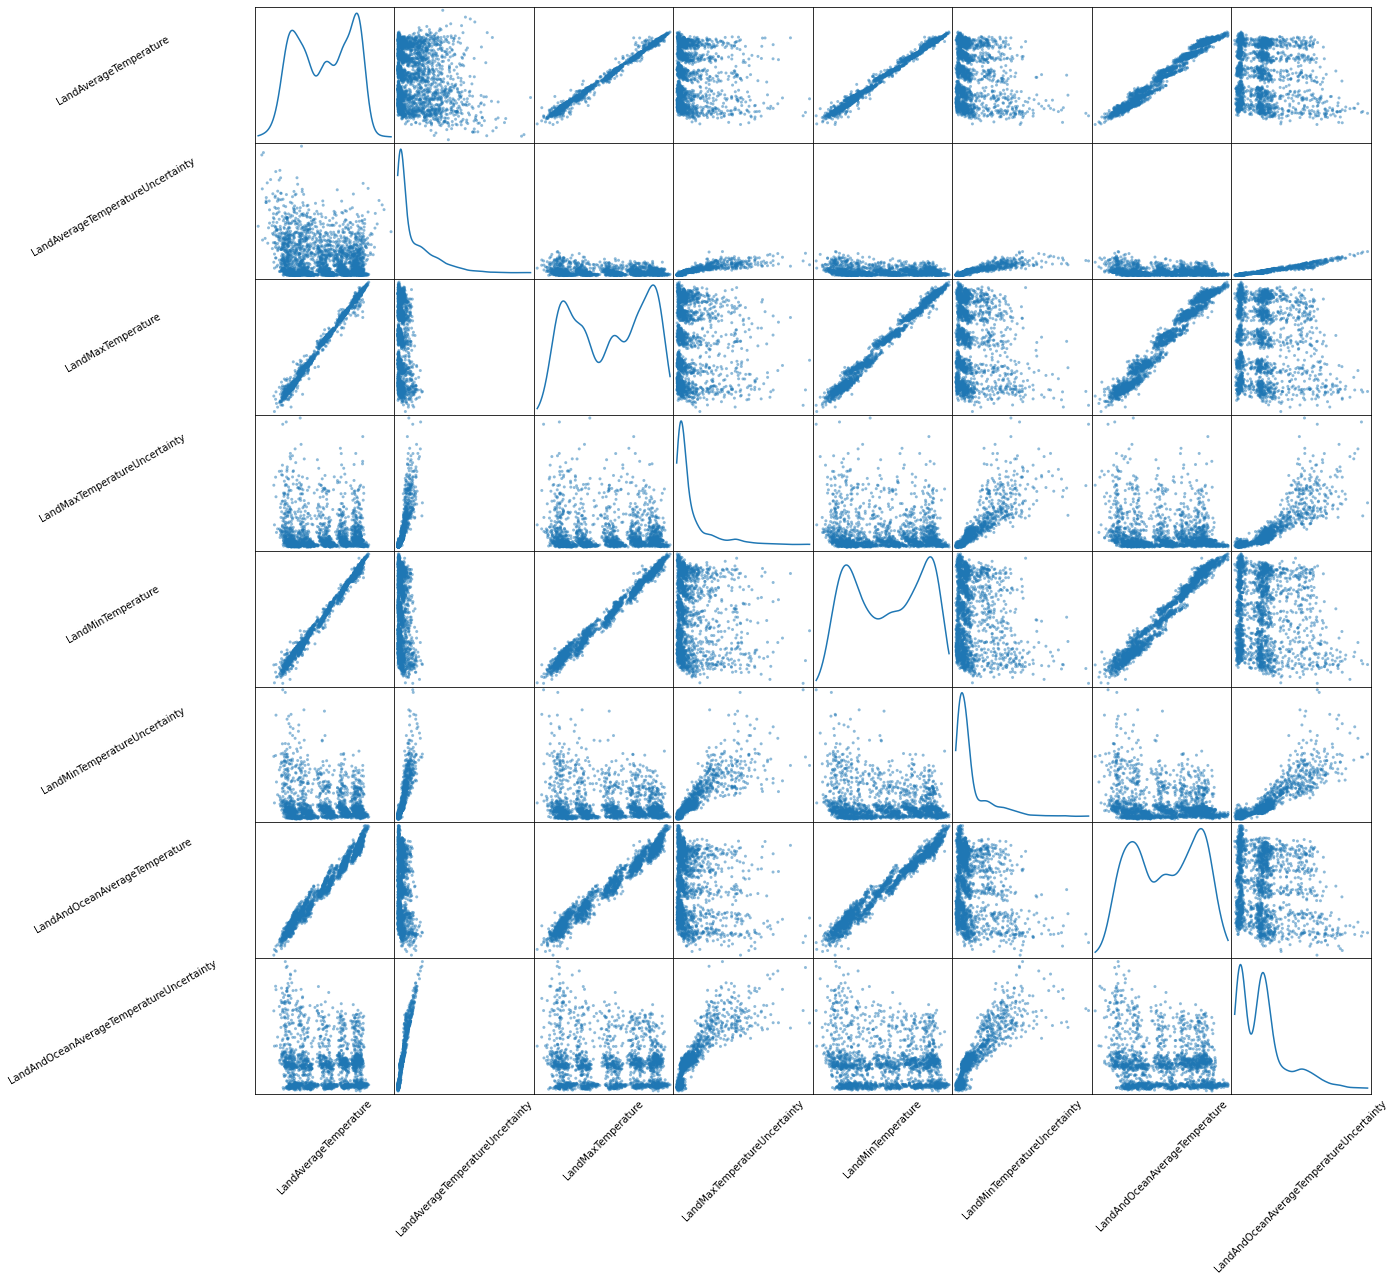

In [ ]:
sm = pd.plotting.scatter_matrix(df_temperatures, figsize=(20, 20), diagonal='kde')

#Change label rotation
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(30) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.savefig('fig1.pdf', bbox_inches='tight', dpi=400)

In [ ]:
df_city1=df_city
df_city1.dropna(axis=0,inplace=False)

dt  AverageTemperature  ...  Latitude Longitude
0        1743-11-01               6.068  ...    57.05N    10.33E
5        1744-04-01               5.788  ...    57.05N    10.33E
6        1744-05-01              10.644  ...    57.05N    10.33E
7        1744-06-01              14.051  ...    57.05N    10.33E
8        1744-07-01              16.082  ...    57.05N    10.33E
...             ...                 ...  ...       ...       ...
8599206  2013-04-01               7.710  ...    52.24N     5.26E
8599207  2013-05-01              11.464  ...    52.24N     5.26E
8599208  2013-06-01              15.043  ...    52.24N     5.26E
8599209  2013-07-01              18.775  ...    52.24N     5.26E
8599210  2013-08-01              18.025  ...    52.24N     5.26E

[8235082 rows x 7 columns]

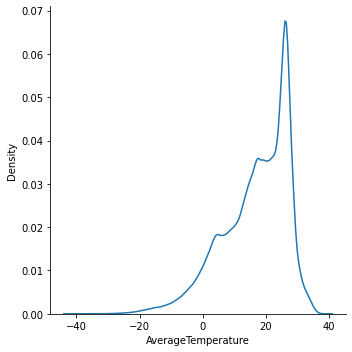

In [ ]:
sns.displot(df_city1, x='AverageTemperature', kind="kde") # you can do displots in a easy 1 line of code to show the range of the data of the dataset
plt.savefig('fig2.pdf', bbox_inches='tight', dpi=400)

In [ ]:
sns.displot(df_country, x='AverageTemperature', kind="kde")
plt.savefig('fig3.pdf', bbox_inches='tight', dpi=400)

In [ ]:
import plotly.graph_objects as go
#Removing the duplicated countries and countries for which no information about the temperature
global_temp_country_clean = df_country[~df_country['Country'].isin(['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands','United Kingdom', 'Africa', 'South America'])]
global_temp_country_clean = global_temp_country_clean.replace(['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],['Denmark', 'France', 'Netherlands', 'United Kingdom'])

#Average temperature for each country
countries = np.unique(global_temp_country_clean['Country'])
mean_temp_list = []
for country in countries:
    mean_temp_list.append(global_temp_country_clean[global_temp_country_clean['Country'] == country]['AverageTemperature'].mean())

# Creating figure using 'plotly' library
data = [ dict(type = 'choropleth',locations = countries,z = mean_temp_list,locationmode = 'country names',text = countries,marker = dict(line = dict(color = 'rgb(0,0,0)', width = 1)),colorbar = dict(autotick = True, tickprefix = '', title = '# Mean\nTemperature,\n°C'))]
layout = dict(title = 'Mean land temperature in countries',geo = dict(showframe = False,showocean = True,oceancolor = 'rgb(0,255,255)',projection = dict(type = 'orthographic',rotation = dict(lon = 60,lat = 10),),lonaxis =  dict(showgrid = True,gridcolor = 'rgb(102, 102, 102)'),lataxis = dict(showgrid = True,gridcolor = 'rgb(102, 102, 102)')),)
fig = dict(data=data, layout=layout)
import plotly.offline as py
py.iplot(fig, validate=False, filename='worldmap', auto_play=True)


- ### ***C02 Data***

For the CO2 dataset, we have to filter out all the dates and times that came before 1750, since none of our datasets extends so far, far away in time. Thus, first, we load the data:

In [ ]:
df_co2= pd.read_csv('/content/drive/Shareddrives/Climate_Change/CO2AirPPM.csv')

And then we filter by year > 1750. For simplicity, we will only keep the datetime, year and data_mean_global columns, removing all others. Thus:

In [ ]:
df_co2_prefiltered = df_co2[df_co2['year']>=1750]
df_co2_prefiltered['datetime'] = pd.to_datetime(df_co2_prefiltered['datetime']).dt.date
df_co2_filtered = df_co2_prefiltered[['datetime', 'data_mean_global','year']]
df_co2_filtered.reset_index(inplace=True) #We reset the pesky index!
df_co2_filtered.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index    datetime  data_mean_global  year
0  21000  1750-01-15        277.813529  1750
1  21001  1750-02-15        278.196558  1750
2  21002  1750-03-15        278.538475  1750
3  21003  1750-04-15        278.779124  1750
4  21004  1750-05-15        278.723560  1750

In [ ]:
df_co2_viz = df_co2_filtered.groupby(['year']).mean().drop('index', axis = 1)
plt.plot(df_co2_viz)
plt.title('Evolution of the quantity of CO2 in the atmosphere from 1750')
plt.ylabel('Quantity of CO2 (ppm)')
plt.xlabel('Year')
plt.savefig('fig4_evolutionCO2.pdf', bbox_inches='tight', dpi=400)

- ### ***GDP Data***

Once again, we first load the data:

In [ ]:
df_gdp_2010_pre = pd.read_csv('/content/drive/Shareddrives/Climate_Change/GDPupto2010.csv')

And then we proceed to process it. To do this, we are going to change all the blank values to NaN, which makes it easier for python to handle the data, and we are going to place the countries as Index, which gets them out of the way when adding (since they are strings). To avoid artifacts in the measure, we eliminate those countries with missing values, since their existence, especially in the 2000s, distorted the data tremendously, making it look like there was a global GDP collapse in 2007 that brought us back to 1850 levels (we know there was a drop in GDP, but it was not that big). Finally, we changed the data type to float and summed all the values in a "Total" row column, which we converted into a column by transposing the matrix and saved with proper formatting for next steps. 

In [ ]:
df_gdp_2010_pre.replace(' ', np.nan, inplace=True)
df_gdp_2010_pre.set_index('ISO', inplace=True)
df_gdp_2010_pre.dropna(axis=0, inplace=True)
df_gdp_2010_pre = df_gdp_2010_pre.astype(float)
df_gdp_2010_pre.loc['Total',:] = df_gdp_2010_pre.sum(axis=0)

In [ ]:
df_gdp = df_gdp_2010_pre.transpose()['Total']


Finally, to check that the data makes sense, we plot it: if we are right, we should get an almost exponential growth curve:


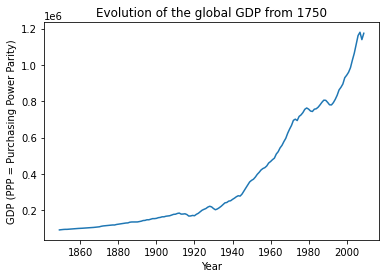

In [ ]:
plt.plot(range(1849,2010),df_gdp) #Is the bump the URSS collapse? hehe 
#UNIT: in 2005 PPP $, PPP = purchasing power parity
plt.title('Evolution of the global GDP from 1750')
plt.ylabel('GDP (PPP = Purchasing Power Parity)')
plt.xlabel('Year')
plt.savefig('fig5_evolutionGDP.pdf', bbox_inches='tight', dpi=400)

- ### ***Sea Levels***

We load the data:

In [ ]:
sea = pd.read_csv("/content/drive/Shareddrives/Climate_Change/sea_levels_2015.csv")

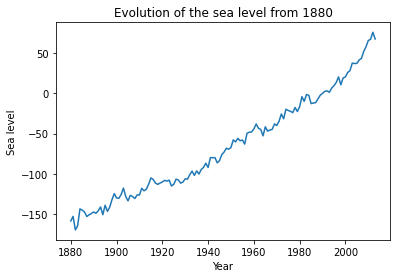

In [ ]:
sea['Year'] = pd.to_datetime(sea['Time']).dt.year
plt.plot(sea.groupby(sea.Year).mean().drop('GMSL uncertainty', axis = 1))
plt.title('Evolution of the sea level from 1880')
plt.xlabel('Year')
plt.ylabel('Sea level')
plt.savefig('fig6_evolutionsea.pdf', bbox_inches='tight', dpi=400)

### **VALIDATION OF THE HYPOTHESIS**

- ### ***Initial Exploration***

To study the increasing of temperatures, we first plot the increment of the temperatures in a map by year.

In [ ]:
#Increasing of the temperature by countries
df_city['Date'] = pd.to_datetime(df_city['dt'])
df_city['year'] = df_city ['Date'].dt.year
by_year = df_city.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()
continent_map = pd.read_csv("/content/drive/Shareddrives/Climate_Change/continents2.csv") #only for the iso codes, not relevant statistically, only for the plot
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]
data_country = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')
# filter
# hay demasiados nan en 1825 y en otros años también porque los datos no se han cogido bien hasta 1826
data_country = data_country[data_country['year'] > 1825]
data_country = data_country.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

In [ ]:
# Plotly
import plotly
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots
data_country['AverageTemperature'] = data_country['AverageTemperature'] + 6 # standardize the temperatures because the size of the bubbles in the scatter cannot be negative
fig = px.scatter_geo(data_country, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size=data_country["AverageTemperature"], size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Globe Map of the temperature increase')
fig.show()
import plotly.offline as py
py.iplot(fig, validate=False, filename='map')

To study whether our hypothesis is correct or not, the first thing we need to do is to group the temperature data by year, as these are currently grouped by month, an excessively granular measure for our analysis.

In [ ]:
#First, we re-read the data by parsing the dates
temperature_over_years= pd.read_csv('/content/drive/Shareddrives/Climate_Change/GlobalTemperatures.csv', parse_dates=['dt'])
temperature_year = temperature_over_years.groupby(temperature_over_years.dt.dt.year).mean() #And we group by year

Since the CO2 data is already grouped by year only, we dont need to group it; however, we can get its mean and standard deviation, which will be useful when we calculate the correlations:

In [ ]:
Co2_over_years = df_co2_filtered.groupby(df_co2_filtered.year).mean()
Co2_over_years_uncertainty = df_co2_filtered.groupby(df_co2_filtered.year).std()
plt.figure(figsize = (10,10))
plt.plot(Co2_over_years_uncertainty.drop('index', axis = 1))
plt.title('Standard deviation of the temperature from 1750', size=14)
plt.xlabel('Year', size=12)
plt.ylabel('Standard deviation', size=12)
plt.savefig('fig7_standar_deviation.pdf', bbox_inches='tight', dpi=400)


First, as an intuitive way to see if there is indeed a correlation or not between the data, we have decided to make a couple of graphs showing, in the same figure, the evolution of atmospheric CO2 and land and land and ocean temperatures, respectively, so that we can guess whether they might be correlated or not. So:

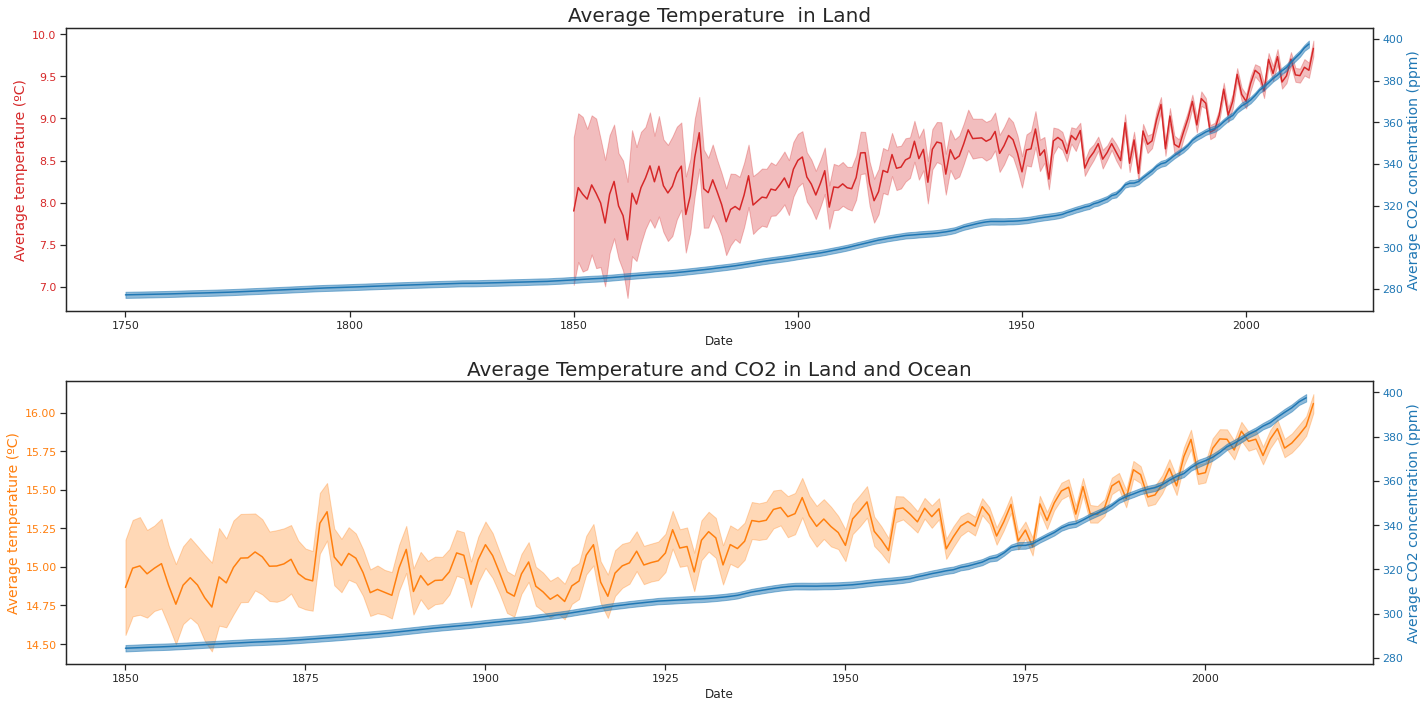

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

#Only land temperature
color = 'tab:red'
ax[0].tick_params(axis='y', labelcolor=color)
ax[0].set_ylabel('Average temperature (ºC)', color = color, size=14)
ax[0].plot(temperature_year.LandAverageTemperature, color= color)
ax[0].fill_between(temperature_year.index, (temperature_year.LandAverageTemperature+temperature_year.LandAverageTemperatureUncertainty),
                   (temperature_year.LandAverageTemperature-temperature_year.LandAverageTemperatureUncertainty), alpha=0.3, color=color)
ax1 = ax[0].twinx()
color = 'tab:blue'
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(Co2_over_years.data_mean_global, color = color)
ax1.fill_between(Co2_over_years_uncertainty.index, (Co2_over_years.data_mean_global + Co2_over_years_uncertainty.data_mean_global), (Co2_over_years.data_mean_global - Co2_over_years_uncertainty.data_mean_global),
color=color, alpha=0.5)
ax1.set_ylabel('Average CO2 concentration (ppm)', color = color, size=14)


#Land and Ocean temperature
color = 'tab:orange'
ax[1].tick_params(axis='y', labelcolor=color)
ax[1].set_ylabel('Average temperature (ºC)', color=color, size=14)
ax[1].plot(temperature_year.LandAndOceanAverageTemperature, color=color)
ax[1].fill_between(temperature_year.index, (temperature_year.LandAndOceanAverageTemperature+temperature_year.LandAndOceanAverageTemperatureUncertainty), 
                   (temperature_year.LandAndOceanAverageTemperature-temperature_year.LandAndOceanAverageTemperatureUncertainty), alpha=0.3, color=color)
ax2 = ax[1].twinx()
color = 'tab:blue'
ax2.plot(Co2_over_years[Co2_over_years.index>=1850].data_mean_global, color = color)
ax2.fill_between(Co2_over_years_uncertainty.index[Co2_over_years.index>=1850], (Co2_over_years[Co2_over_years.index>=1850].data_mean_global + Co2_over_years_uncertainty[Co2_over_years.index>=1850].data_mean_global)
, (Co2_over_years[Co2_over_years.index>=1850].data_mean_global - Co2_over_years_uncertainty[Co2_over_years.index>=1850].data_mean_global),
color=color, alpha=0.5)
ax2.set_ylabel('Average CO2 concentration (ppm)', color = color, size=14)
ax2.tick_params(axis='y', labelcolor=color)


#labels
ax[0].set_xlabel('Date')
ax[1].set_xlabel('Date')


#titles
ax[0].set_title('Average Temperature  in Land', fontsize=20)
ax[1].set_title('Average Temperature and CO2 in Land and Ocean', fontsize=20)
fig.tight_layout()
plt.savefig('fig8_temperatureandco2.pdf', bbox_inches='tight', dpi=400)


As we can see in the figures, there is a fairly clear correlation between the increase in temperature and the atmospheric concentration of CO2, especially in the second case, which measures the average temperature over both land and sea. This makes sense for two reasons: the first is that the first dataset, which includes only land temperature, starts much earlier, in 1750, when measurements were made by hand, at different times of the day and with imprecise mercury thermometers, so the deviation in the data, and therefore the deviation in the correlation, is much larger. On the other hand, it is quite credible that the temperature has increased more in the oceans than on land: not only is it known that the oceans, which are acidifying, are large reservoirs of CO2, the absorption of which could increase their average temperature, but also that the effect of evaporation of water, one of the most potent greenhouse gases (yes, water is **actually** a greenhouse gas, although it doesnt stay for long in the atmosphere, making it less risky than methane or CO2), is much, much greater there than on land, so it is to be expected that local temperatures are much higher, and therefore that the correlation with the amount of atmospheric CO2 is more accurate. It should also be noted that 75% of the surface of the Earth is covered by oceans, so it is to be expected that they will pay an outsized role in overall temperatures, determining correlation.

On the other hand, it is interesting to note, in the terrestrial temperature data, a huge drop in temperatures between about 1810 and 1840. Although it is partly due, as we mentioned before, to the poor quality of the measurements, such a sustained drop in time reminds our team of the Little Ice Age, which, although it had its minimums between 1770 and 1850, happened around that time.

- ### ***Correlation***

However, all the things done until now consist of a mere visual analysis and, to give solidity to our work, we must perform one or more tests of statistical significance; in our case, we have decided to make a linear fit and calculate the coefficient of determination of the same, so that we can thus affirm with total solidity that our data are correlated, and, therefore, that climate change is real.

In [ ]:
#First, we re-read the data by parsing the dates
sea['Year'] = pd.to_datetime(sea['Time']).dt.year
sea_year = sea.groupby(sea.Year).mean() #And we group by year

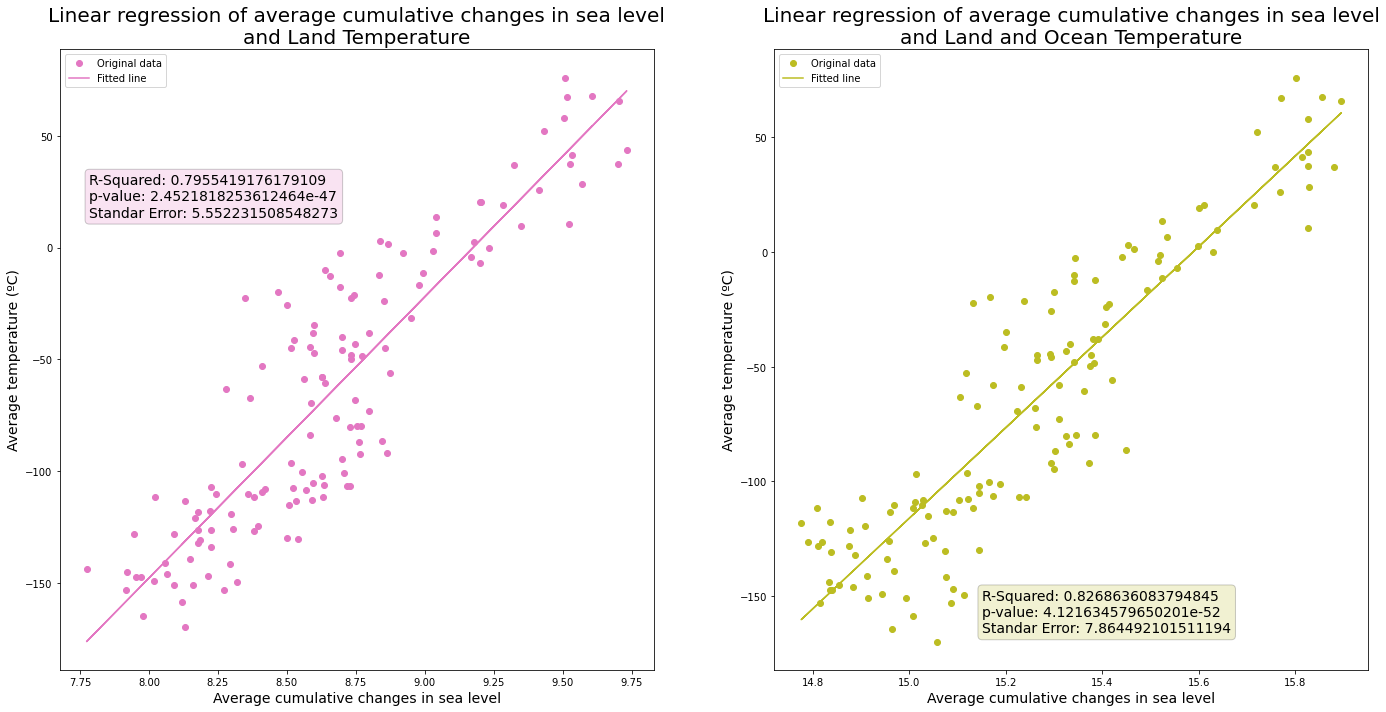

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

x = temperature_year[(temperature_year.index>=1880) & (temperature_year.index <= 2013)].LandAverageTemperature.to_numpy()
x = x[~(np.isnan(x))]

y = sea_year.GMSL.to_numpy()
y = y[~(np.isnan(y))]
res1 = sp.stats.linregress(x, y)
ax[0].plot(x, y, 'o', label='Original data', color = 'tab:pink')
ax[0].plot(x, res1.intercept + res1.slope*x, 'tab:pink', label='Fitted line')
ax[0].legend()
string = f"R-Squared: {res1.rvalue**2}" + "\n"+ f"p-value: {res1.pvalue}" + "\n" + f"Standar Error: {res1.stderr}"
props = dict(boxstyle='round', facecolor='tab:pink', alpha=0.2)
ax[0].text(0.05, 0.8, string, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax[0].set_xlabel("Average cumulative changes in sea level", size=14)
ax[0].set_ylabel("Average temperature (ºC)", size=14)
ax[0].set_title("Linear regression of average cumulative changes in sea level\n"  "and Land Temperature", size=20)




x = temperature_year[(temperature_year.index>=1880) & (temperature_year.index <= 2013)].LandAndOceanAverageTemperature.to_numpy()
x = x[~(np.isnan(x))]

y = sea_year.GMSL.to_numpy()
y = y[~(np.isnan(y))]
res = sp.stats.linregress(x, y)
ax[1].plot(x, y, 'o', label='Original data', color = 'tab:olive')
ax[1].plot(x, res.intercept + res.slope*x, 'tab:olive', label='Fitted line')
ax[1].legend()
string = f"R-Squared: {res.rvalue**2}" + "\n"+ f"p-value: {res.pvalue}" + "\n" + f"Standar Error: {res.stderr}"
props = dict(boxstyle='round', facecolor='tab:olive', alpha=0.2)
ax[1].text(0.35, 0.13, string, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax[1].set_xlabel("Average cumulative changes in sea level", size=14)
ax[1].set_ylabel("Average temperature (ºC)", size=14)
ax[1].set_title("Linear regression of average cumulative changes in sea level\n""and Land and Ocean Temperature", size=20)
fig.tight_layout()
save__linear_sea = plt.gcf()
save_linear_sea.savefig('fig9_linear_regression_sea.pdf', bbox_inches='tight', dpi=400)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))

v = temperature_year[temperature_year.index < 2015].LandAverageTemperature.to_numpy()
v = v[~(np.isnan(v))]

w = Co2_over_years[Co2_over_years.index>=1850].data_mean_global.to_numpy()
w = w[~(np.isnan(w))]
res2 = sp.stats.linregress(v, w)
ax[0].plot(v, w, 'o', label='Original data', color = 'tab:cyan')
ax[0].plot(v, res2.intercept + res2.slope*v, 'tab:cyan', label='Fitted line')
ax[0].legend(); ax[0].set_ylim(270,400); ax[0].set_xlim(7,10)
string = f"R-Squared: {res2.rvalue**2}" + "\n"+ f"p-value: {res2.pvalue}" + "\n" + f"Standar Error: {res2.stderr}"
props = dict(boxstyle='round', facecolor='tab:cyan', alpha=0.2)
ax[0].text(0.05, 0.8, string, transform=ax[0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax[0].set_xlabel("Average CO2 concentration (ppm)", size=12)
ax[0].set_ylabel("Average temperature (ºC)", size=12)
ax[0].set_title("Linear regression of atmospheric Co2\n" "and Land Temperature", size=14)


x = temperature_year[temperature_year.index < 2015].LandAndOceanAverageTemperature.to_numpy()
x = x[~(np.isnan(x))]

y = Co2_over_years[Co2_over_years.index>=1850].data_mean_global.to_numpy()
y = y[~(np.isnan(y))]
res = sp.stats.linregress(x, y)
ax[1].plot(x, y, 'o', label='Original data', color = 'xkcd:sky blue')
ax[1].plot(x, res.intercept + res.slope*x, 'xkcd:sky blue', label='Fitted line')
ax[1].legend()
string = f"R-Squared: {res.rvalue**2}" + "\n"+ f"p-value: {res.pvalue}" + "\n" + f"Standar Error: {res.stderr}"
props = dict(boxstyle='round', facecolor='xkcd:sky blue', alpha=0.2)
ax[1].text(0.35, 0.13, string, transform=ax[1].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax[1].set_xlabel("Average CO2 concentration (ppm)", size=12)
ax[1].set_ylabel("Average temperature (ºC)", size=12)
ax[1].set_title("Linear regression of atmospheric Co2\n" "and Land and Ocean Temperature", size=14)
fig.tight_layout()
save_linear_co2 = plt.gcf()
save_linear_co2.savefig('fig9_linear_regression_co2.pdf', bbox_inches='tight', dpi=400)
plt.show();

As we can see in the graph, our suspicions are confirmed, and, indeed, the combined mean temperature in the sea and ocean has a very good correlation (of 0.8, being datasets over hundreds of years with different measurement methods and variabilities) with the atmospheric concentration of CO2, indicating that, indeed, climate change exists and is due to the increase of CO2 on land. However, we can see that land temperature alone is barely correlated with CO2 concentration, presenting a very low correlation coefficient of only 0.51.

This, which at first might seem to be a problem as it contradicts our hypothesis, is not, for two reasons. The first is that, on land, 75% of the surface is occupied by ocean mass, so it is understandable that data that include the sea have a disproportionate influence on the relationship with a global variable such as the atmospheric concentration of CO2. Second, and no less important, is that this phenomenon has already been observed in previous literature: water masses have an inordinate effect in accepting heat, acting as a buffer that has so far protected us from the worst effects of climate change, taking as a price, among others, the lives of thousands of corals off the Australian coast.

With these analyses, we therefore consider the following axioms to be proven: that the earth is warming, and that this warming is due to an increase in the amount of CO2 in the atmosphere.

- ### ***The Human Factor***

**Country's GDP**

The most skeptical, however, will still say: this is not true! Yes, it is possible that CO2 causes climate change; but it is not caused by human activity, but by natural processes of the earth! To try to address these concerns, and to evaluate, through statistics, whether climate change is caused by man or not, we have decided to perform the following analysis. 

It is widely proven that, at least until a few years ago, the growth in a country's GDP, which used to be associated with industrial growth, is associated with a growth in the country's greenhouse gas emissions (and therefore CO2); thus, if we were to see that there is an association between global GDP, the observed increase in temperature, and the amount of CO2 in the atmosphere, we could prove that global warming exists, and that it is caused by an increase in **human** CO2 emissions. Thus, we will perform the same analysis as in the previous section, a linear adjustment of the data, taking this time only the data of combined temperature between sea and land, since we have observed in the previous section that they are the most appropriate.

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

# Define global variables
ax.set_xlabel("Global GDP (in 2005 US $,\n" "adjusted by Purchasing Power Parity)", size=12)
axcolor="tab:cyan"; ax1color="#b355e7"
w = df_gdp

v = temperature_year.loc[((temperature_year.index <= 2010) & (temperature_year.index >= 1850))].LandAverageTemperature.to_numpy()
v = v[~(np.isnan(v))]
res = sp.stats.linregress(w,v)
ax.plot(w,v, 'o', label='Original data', color = axcolor)
ax.plot(w, res.intercept + res.slope*w, axcolor, label='Fitted line')
ax.tick_params(axis='y', labelcolor=axcolor)
string = f"R-Squared: {res.rvalue**2}" + "\n"+ f"p-value: {res.pvalue}" + "\n" + f"Standar Error: {res.stderr}"
props = dict(boxstyle='round', facecolor=axcolor, alpha=0.2)
ax.legend(); 
ax.text(0.05, 0.9, string, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax.set_ylabel("Average temperature (ºC)", color=axcolor, size=12)


#Second plot
x = Co2_over_years[((Co2_over_years.index <= 2010) & (Co2_over_years.index >= 1850))].data_mean_global.to_numpy()
x = x[~(np.isnan(x))]

ax1 = ax.twinx() # Do it on the same fig
res2 = sp.stats.linregress(w, x)
ax1.plot(w, x, 'o', label='Original data', color = ax1color)
ax1.plot(w, res2.intercept + res2.slope*w, ax1color, label='Fitted line')
ax1.tick_params(axis='y', labelcolor=ax1color)
string = f"R-Squared: {res2.rvalue**2}" + "\n"+ f"p-value: {res2.pvalue}" + "\n" + f"Standar Error: {res2.stderr}"
props = dict(boxstyle='round', facecolor=ax1color, alpha=0.2)
ax1.legend(); ax1.set_ylim(270,400)
ax1.text(0.45, 0.2, string, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.tick_params(axis='y', labelcolor=ax1color)
ax1.legend(loc="lower right"); 
ax1.set_ylabel("Average CO2 concentration (ppm)", color=ax1color, size=12)

save_linear_double = plt.gcf()
save_linear_double.savefig('fig9_linear_regression_gdp.pdf', bbox_inches='tight', dpi=400)

ax.set_title("Linear regression of atmospheric Co2\n" "and Land and Ocean Temperature", size=14)
fig.tight_layout()

As we can see in the graph, global temperature over time and global GDP have a correlation of 0.72, which, although weak, is not negligible: indeed, it seems that, in order to grow, humans overheat the planet, as we had indicated in our hypothesis.

What is surprising, because of its high correlation of 95%, is the link between CO2 and global GDP: indeed, it seems that, in order to grow, humans are dependent on fossil fuels on a scale that, at least, I was not aware of until now. This very high correlation is all the more surprising in that these are data sets that we have downloaded from completely different sites on the internet, and that we have preprocessed as we saw fit without ever looking for prior correlation. It is, indeed, a good indicator of the serious trouble we are in. 

This is further reinforced by the connection expressed above between temperature and GDP: indeed, it seems that the three variables have a lot to do with each other.

**Industrial Revolution**

Finally, we have performed a small analysis to see how statistically significant the change in temperature on land and ocean before and after the industrial revolution is; as described above, the correlation between the two values should be high, since we see that GDP is correlated with temperature and we suppose GDP will be highly correlated with CO2 emisssions.

In [ ]:
#Redo boxplot and include the t'student
temperature_year['Industrial revolution'] = np.where(temperature_year.index<= 1980, 'before', 'after') # creating a new columns

temperature_year.dropna(inplace=True)

In [ ]:
# function for calculating the t-test for two independent samples
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = np.mean(data1), np.mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = np.sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
  #	two classes: before and after industrial revolution, degrees of freedom = two classes -1 = 1
	df = 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, 1)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), 1)) * 2.0
	# return everything
	return t_stat, df, cv, p


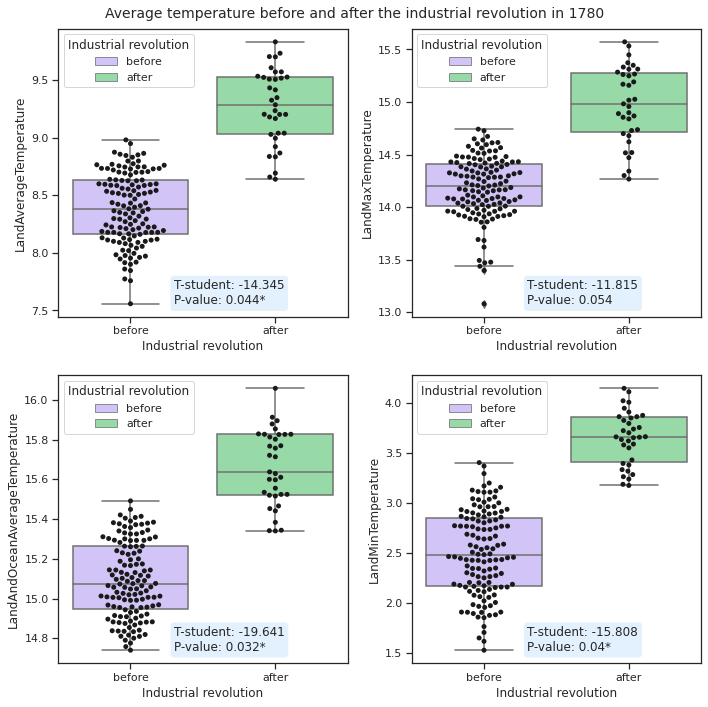

In [ ]:
# make fig
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2, figsize=(10,10))

fig.suptitle('Average temperature before and after the industrial revolution in 1780', size=14)
# Change in average temperature before/after industrial revolution
sns.set_theme(style="ticks", palette="pastel")
ax1= sns.boxplot(y='LandAverageTemperature', x='Industrial revolution', data=temperature_year, ax=ax1, palette=["m", "g"], hue='Industrial revolution', dodge=False)
ax1 = sns.swarmplot(y='LandAverageTemperature', x='Industrial revolution', data=temperature_year, color=".1", ax=ax1)
t_stat, df, cv, p = independent_ttest(temperature_year[temperature_year['Industrial revolution']=='before'].LandAverageTemperature, temperature_year[temperature_year['Industrial revolution']=='after'].LandAverageTemperature, 0.05)
string = f"T-student: {np.round(t_stat, decimals=3)}" + "\n" + f"P-value: {np.round(p, decimals=3)}*" 
props = dict(boxstyle='round', facecolor='xkcd:sky blue', alpha=0.2)
ax1.text(0.4, 0.13, string, transform=ax1.transAxes,verticalalignment='top', bbox=props)



ax2 = sns.boxplot(y='LandMaxTemperature', x='Industrial revolution', data=temperature_year, ax=ax2, palette=["m", "g"], hue='Industrial revolution', dodge=False)
ax2 = sns.swarmplot(y='LandMaxTemperature', x='Industrial revolution', data=temperature_year, color=".1", ax=ax2)
t_stat, df, cv, p = independent_ttest(temperature_year[temperature_year['Industrial revolution']=='before'].LandMaxTemperature, temperature_year[temperature_year['Industrial revolution']=='after'].LandMaxTemperature, 0.05)
string = f"T-student: {np.round(t_stat, decimals=3)}" + "\n" + f"P-value: {np.round(p, decimals=3)}" 
props = dict(boxstyle='round', facecolor='xkcd:sky blue', alpha=0.2)
ax2.text(0.4, 0.13, string, transform=ax2.transAxes,verticalalignment='top', bbox=props)


ax4 = sns.boxplot(y='LandMinTemperature', x='Industrial revolution', data=temperature_year, ax=ax4,  palette=["m", "g"], hue='Industrial revolution', dodge=False)
ax4 = sns.swarmplot(y='LandMinTemperature', x='Industrial revolution', data=temperature_year, color=".1", ax=ax4)
t_stat, df, cv, p = independent_ttest(temperature_year[temperature_year['Industrial revolution']=='before'].LandMinTemperature, temperature_year[temperature_year['Industrial revolution']=='after'].LandMinTemperature, 0.05)
string = f"T-student: {np.round(t_stat, decimals=3)}" + "\n" + f"P-value: {np.round(p, decimals=3)}*" 
props = dict(boxstyle='round', facecolor='xkcd:sky blue', alpha=0.2)
ax3.text(0.4, 0.13, string, transform=ax3.transAxes,verticalalignment='top', bbox=props)


ax3 = sns.boxplot(y='LandAndOceanAverageTemperature', x='Industrial revolution', data=temperature_year, ax=ax3,  palette=["m", "g"], hue='Industrial revolution', dodge=False)
ax3 = sns.swarmplot(y='LandAndOceanAverageTemperature', x='Industrial revolution', data=temperature_year, color=".1", ax=ax3)
t_stat, df, cv, p = independent_ttest(temperature_year[temperature_year['Industrial revolution']=='before'].LandAndOceanAverageTemperature, temperature_year[temperature_year['Industrial revolution']=='after'].LandAndOceanAverageTemperature, 0.05)
string = f"T-student: {np.round(t_stat, decimals=3)}" + "\n" + f"P-value: {np.round(p, decimals=3)}*" 
props = dict(boxstyle='round', facecolor='xkcd:sky blue', alpha=0.2)
ax4.text(0.4, 0.13, string, transform=ax4.transAxes,verticalalignment='top', bbox=props)


labels = ['Before industrial revolution', 'After industrial revolution']

fig.tight_layout(h_pad=2)
plt.subplots_adjust(top=0.95)
plt.savefig('fig10_boxplots.pdf', bbox_inches='tight', dpi=400)
plt.show()

As we can see in the graph, there is a very high correlation, as measured by the stident t-test, between mean, minimum and maximum temperature, both in the ocean and in global terms (ocean + sea) before and after the industrial revolution. This confirms the results of the previous analysis, adding even more robustness to our conclusions.

- ### ***Where are we going? Our take at predicting the future***

One of the most worrying consequences of climate change is the rise in sea levels. It is well known that the most prosperous regions of the earth, the richest cities, and the majority of the population, are distributed along the shores of the sea, where trade, fishing and exchange of content is easier than inland. This presents us with a dilemma: what will happen when, due to global warming, sea levels rise?

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

#Only land temperature
color = 'tab:red'
ax[0].tick_params(axis='y', labelcolor=color)
ax[0].set_ylabel('Average temperature (ºC)', color = color)
ax[0].plot(temperature_year[temperature_year.index>=1880].LandAverageTemperature, color= color)
ax[0].fill_between(temperature_year[temperature_year.index>=1880].index, (temperature_year[temperature_year.index>=1880].LandAverageTemperature+temperature_year[temperature_year.index>=1880].LandAverageTemperatureUncertainty),
                   (temperature_year[temperature_year.index>=1880].LandAverageTemperature-temperature_year[temperature_year.index>=1880].LandAverageTemperatureUncertainty), alpha=0.3, color=color)
ax1 = ax[0].twinx()
color = 'tab:cyan'
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(sea_year.GMSL, color = color)
ax1.fill_between(sea_year.index, (sea_year.GMSL + sea_year['GMSL uncertainty']),
                 (sea_year.GMSL - sea_year['GMSL uncertainty']),
color=color, alpha=0.5)
ax1.set_ylabel('Average cumulative changes in sea level', color = color, size=12)


#Land and Ocean temperature
color = 'tab:orange'
ax[1].tick_params(axis='y', labelcolor=color)
ax[1].set_ylabel('Average temperature (ºC)', color=color)
ax[1].plot(temperature_year[temperature_year.index>=1880].LandAndOceanAverageTemperature, color=color)
ax[1].fill_between(temperature_year[temperature_year.index>=1880].index, (temperature_year[temperature_year.index>=1880].LandAndOceanAverageTemperature+temperature_year[temperature_year.index>=1880].LandAndOceanAverageTemperatureUncertainty), 
                   (temperature_year[temperature_year.index>=1880].LandAndOceanAverageTemperature-temperature_year[temperature_year.index>=1880].LandAndOceanAverageTemperatureUncertainty), alpha=0.3, color=color)
ax2 = ax[1].twinx()
color = 'tab:cyan'
ax2.plot(sea_year.GMSL, color = color)
ax2.fill_between(sea_year.index, (sea_year.GMSL + sea_year['GMSL uncertainty']),
                 (sea_year.GMSL - sea_year['GMSL uncertainty']),color=color, alpha=0.5)
ax2.set_ylabel('Average cumulative changes in sea level', color = color, size=12)
ax2.tick_params(axis='y', labelcolor=color)


#labels
ax[0].set_xlabel('Date', size = 12)
ax[1].set_xlabel('Date', size=12)


#titles
ax[0].set_title('Average Temperature and average cumulative changes in sea level in Land')
ax[1].set_title('Average Temperature and average cumulative changes in sea level  in Land and Ocean')

plt.savefig('fig11_tempandocean.pdf', bbox_inches='tight', dpi=400)

As we can see from the graphs above, there is a visually clear relationship between temperature increases and sea level rises. If, as we have predicted in the previous parts of this analysis, global temperatures are predestined to rise, we can only think with concern about the future of these coastal cities, and thus of humanity itself.

### **CONCLUSSIONS**

Through a thorough analysis of existing data on GDP, CO2 emissions and temperature over time, we have been able not only to understand how our datasets work, test their consistency and explore their content, but also to demonstrate their use in showing the existence of global warming and proving that it is caused by human industrial activity. While haters may point out that "causation does not imply causation" (which, generally speaking, is true), the reality is that, both from the previous literature available in the "References" section, and from the arguments presented here, the authors of this paper believe that the case for human responsibility for global warming, with all the negative things that go with it, is proven. It is now up to us, then, to remedy the situation, avoiding dangerous consequences such as excessive sea level rise caused by the melting of the poles, which threatens the coastal regions where most of humanity lives to date.



This document is availaible under the [CC By SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/) License